# Imports

In [1]:
import anndata as ad
import anndata as ad
import pandas as pd

from SpatialBiologyToolkit import spatial
from SpatialBiologyToolkit import utils

# Load AnnData

In [ ]:
adata = ad.read_h5ad('adata_avastin')

# <font color=blue>SpOOx pipeline</font>

This will run the 'spatial statistics' component of the SpOOx analysis pipeline on an AnnData object. You can find more information here: https://github.com/Taylor-CCB-Group/SpOOx/tree/main/src/spatialstats

This can take quite a while to run, depending on the number of ROIs

Any errors in running functions will be saved in _errors.csv_

There several extra parameters - run _spatial.run_spoox?_ to see the function help

## Parameters

##### adata
    AnnData object, or path (string) to a saved h5ad file.
##### population_obs
    The .obs that defines the population for each cell    
##### groupby
    If specifed, should be a .obs that identifies different groups in the data.
    In the summary step, it will then summarise the analyses at the levels of the different groups.     
##### samples
    Specify a list of samples, by default will process all samples    
##### specify_functions
    By default will run the follow functions from the Spoox pipeline: 
    paircorrelationfunction morueta-holme networkstatistics 
    
    This is a complete list that will be run if 'all' is used: 
        paircorrelationfunction
        localclusteringheatmaps
        celllocationmap
        contourplots
        quadratcounts
        quadratcelldistributions
        morueta-holme
        networkstatistics        
##### run_analysis
    Whether or not to run the analyis, or just create the spatialstats file    
##### analyse_samples_together
    Whether to analyse all samples together    
##### summary
    Whether to run summary script

## Returns
Creates two folders with outputs of SpOOx pipeline - **spooxout** and **spooxout_summary** by default
        


In [ ]:
spatial.run_spoox(adata, 
                  population_obs='population_specific', #Define which population to use from adata.obs
                  groupby = 'Histopathology', #Which column in the adata.obs that defines the groups
                  specify_functions='all')

# Load in SpOOx summary data

In [2]:
data = pd.read_csv('spooxout_summary/summary.tsv', sep='\t') #Location to the 'summary.tsv' that Spoox makes

# Heatmaps of SpOOx outputs

In [6]:
spatial.create_spoox_heatmaps?

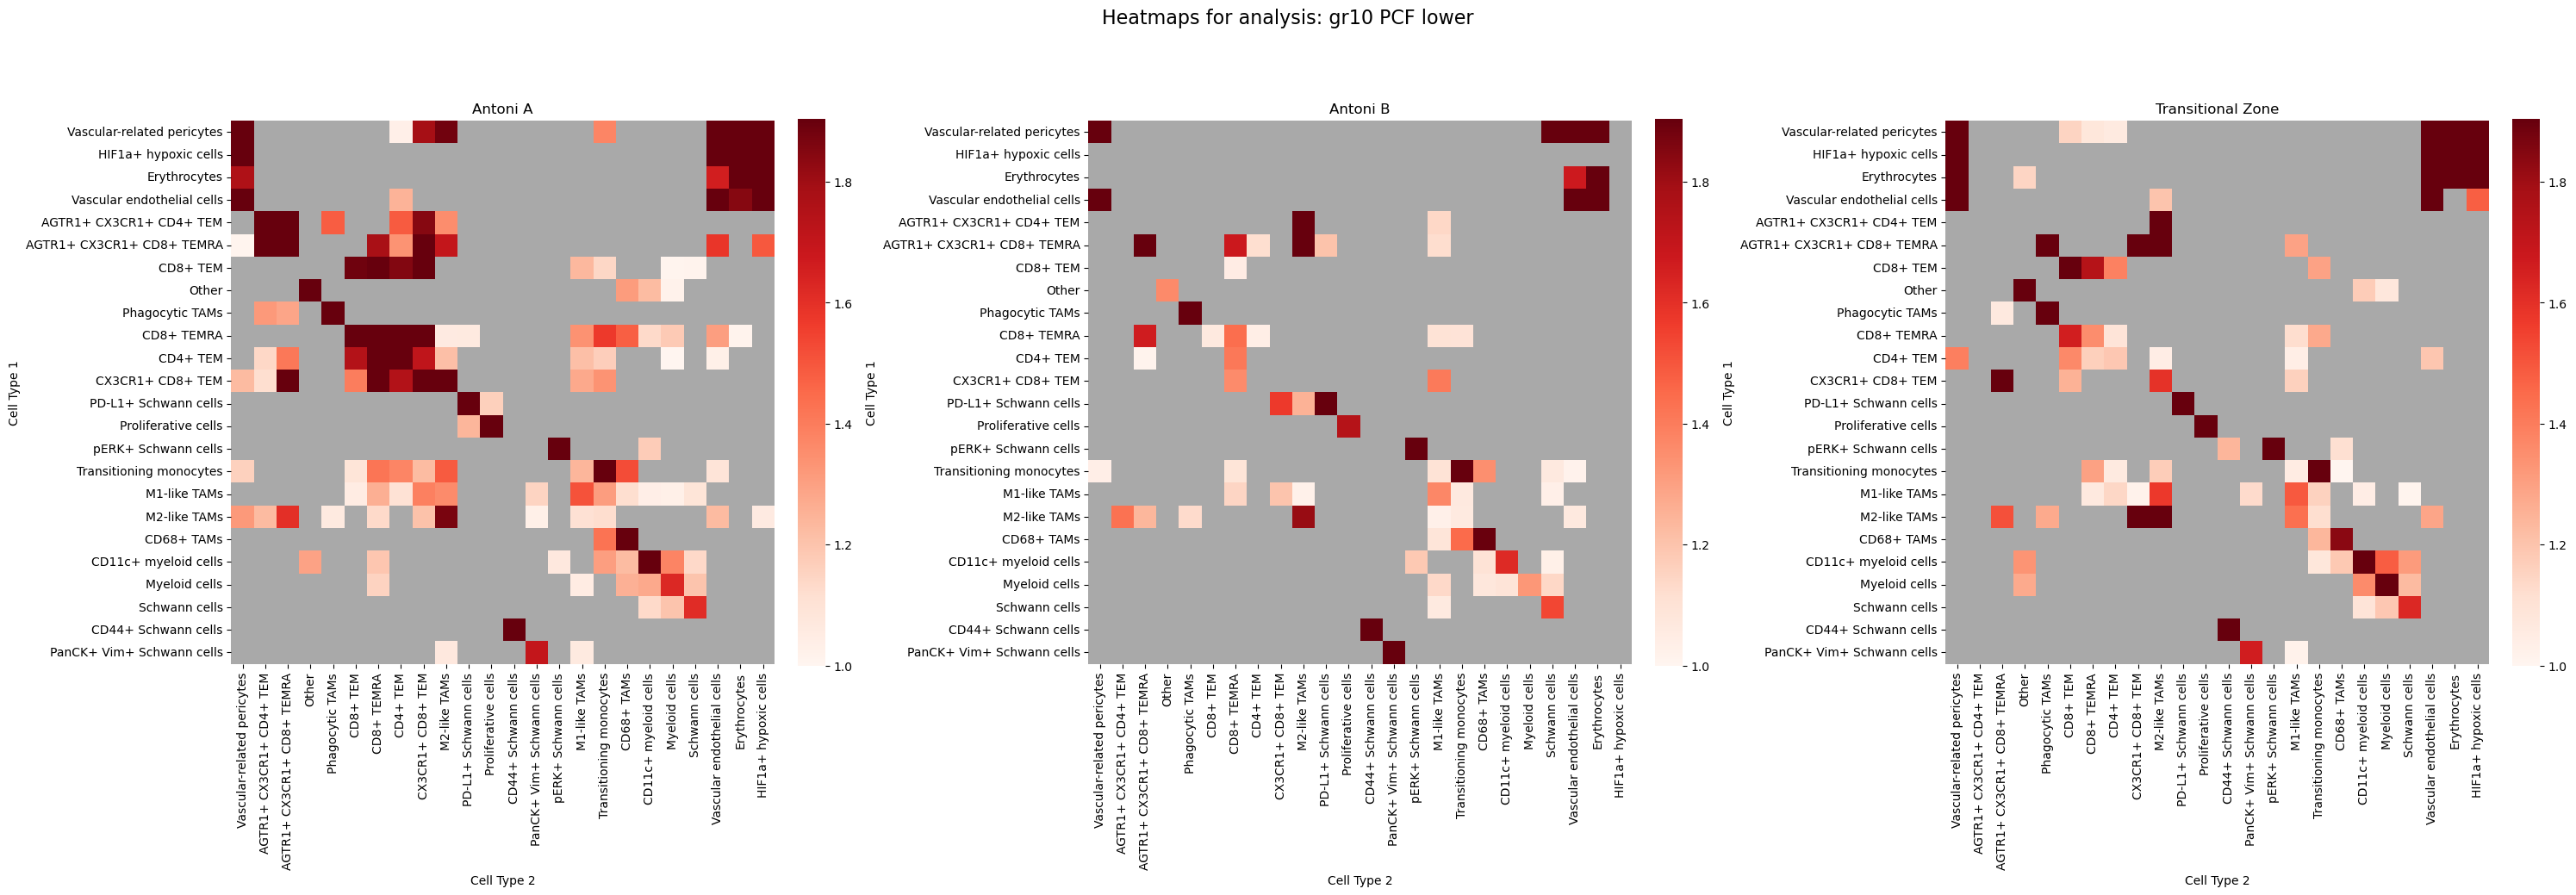

Saved heatmap for column 'gr10 PCF lower' in folder 'spoox_figures'


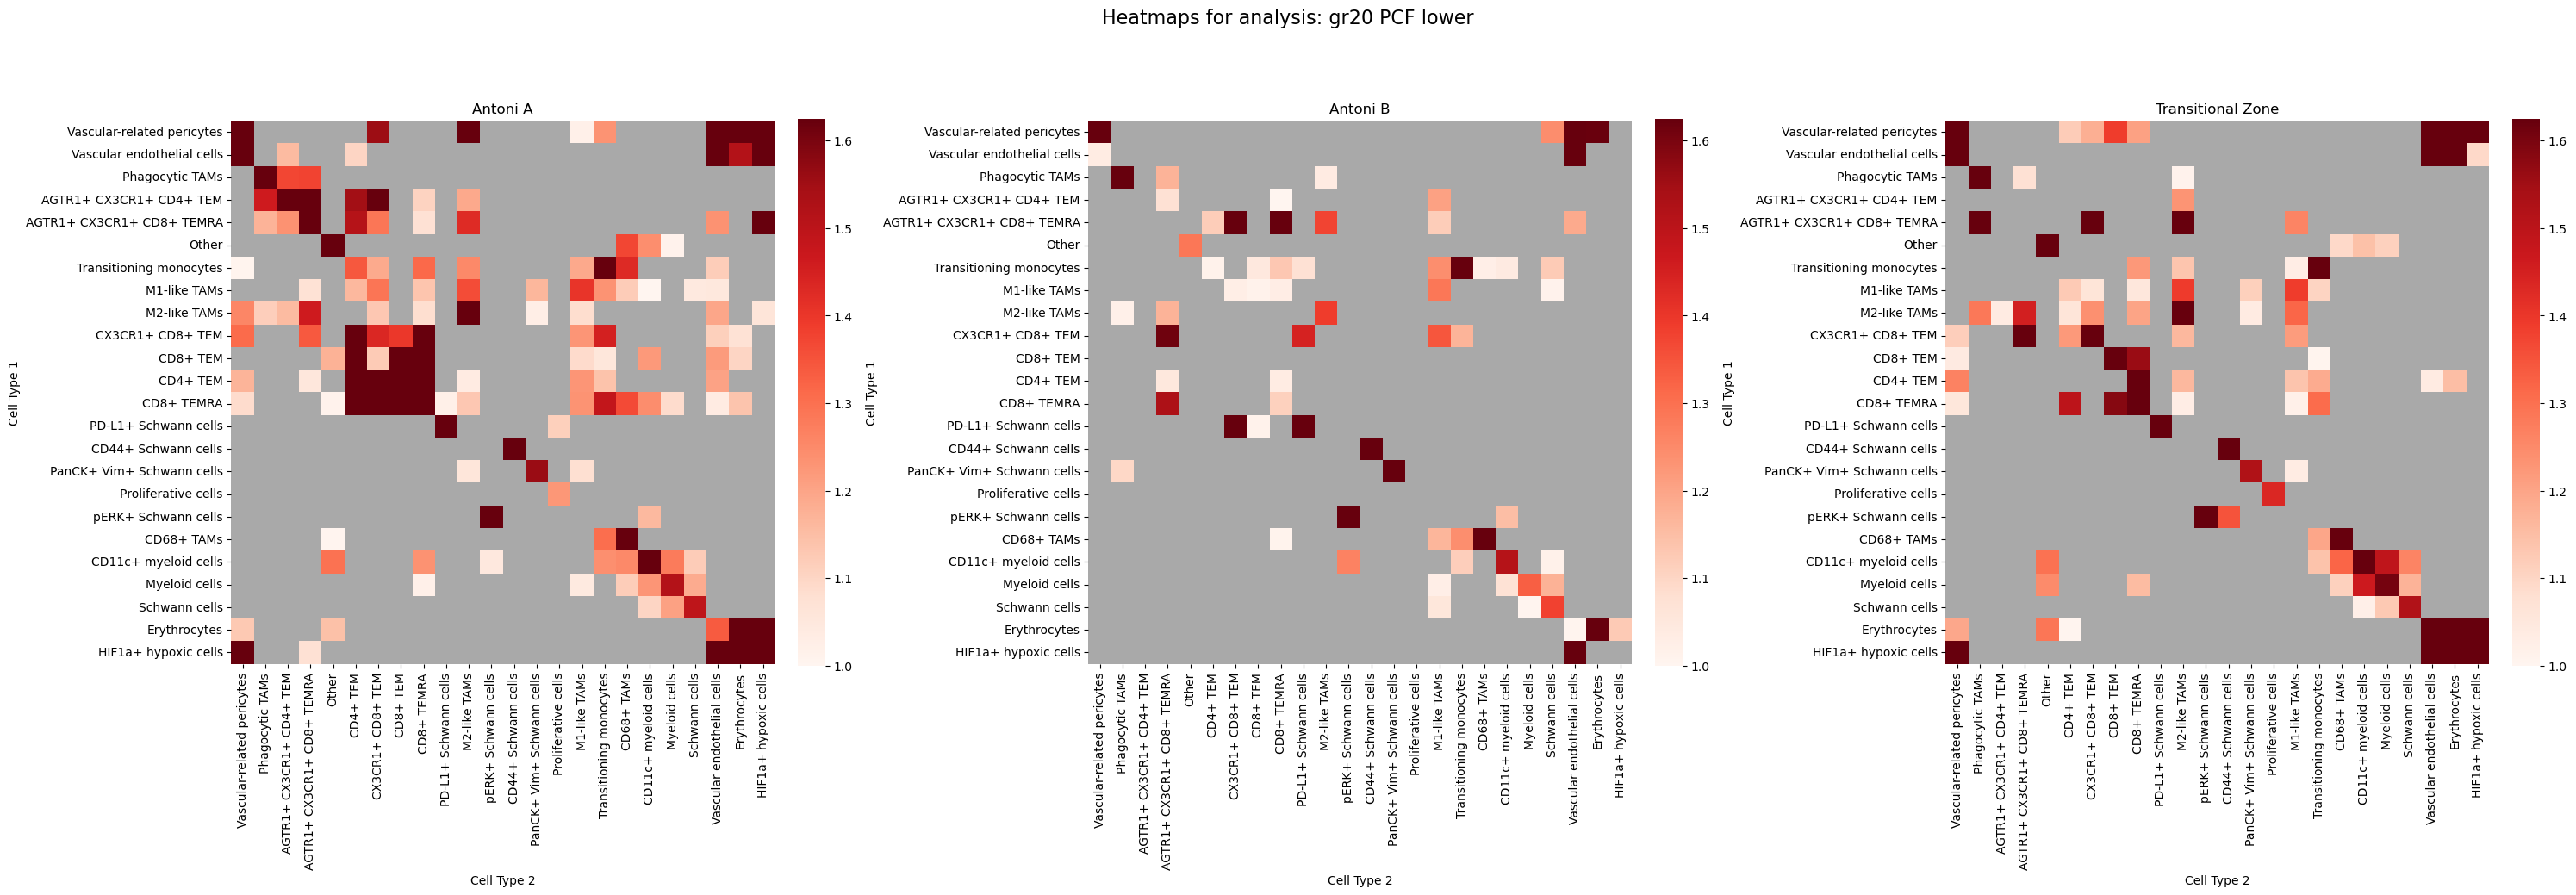

Saved heatmap for column 'gr20 PCF lower' in folder 'spoox_figures'


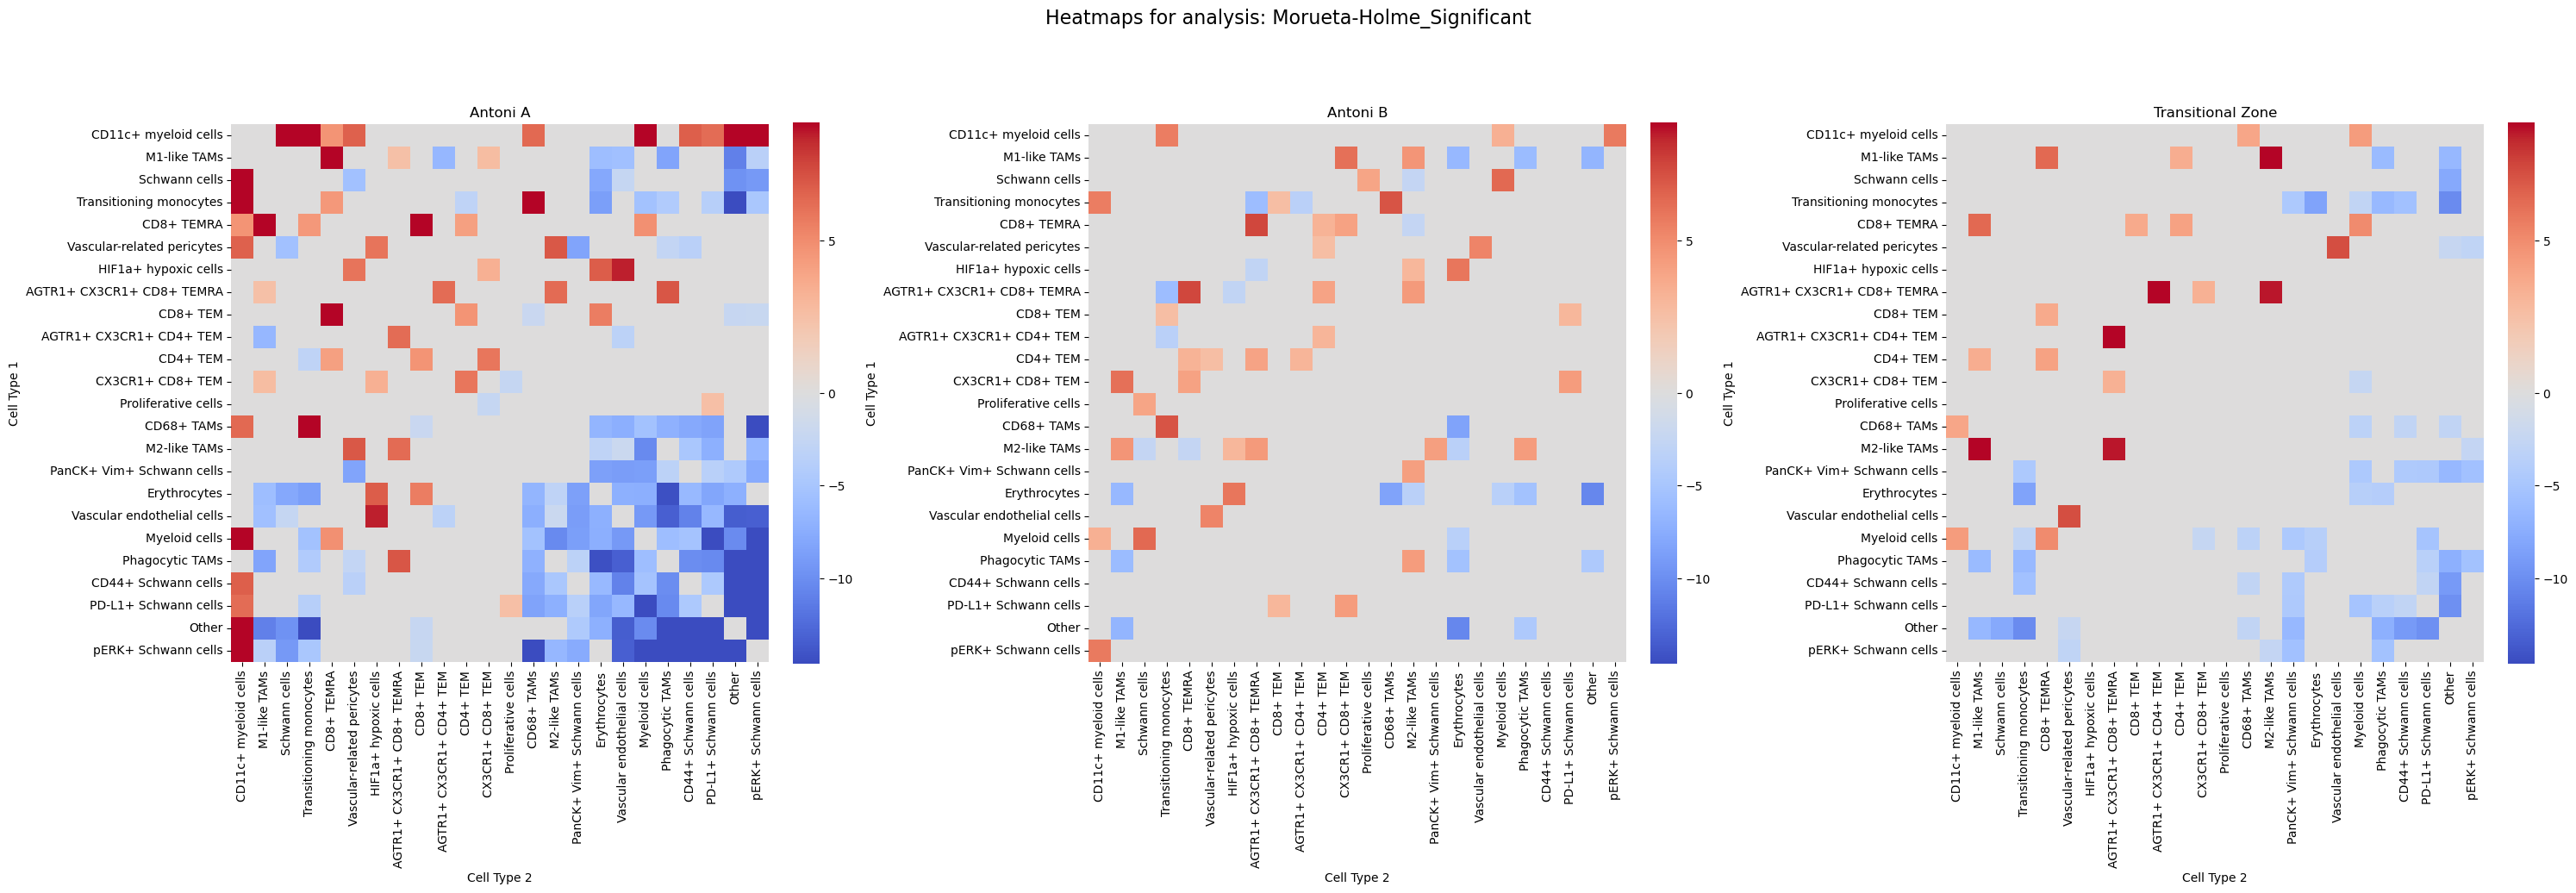

Saved heatmap for column 'Morueta-Holme_Significant' in folder 'spoox_figures'


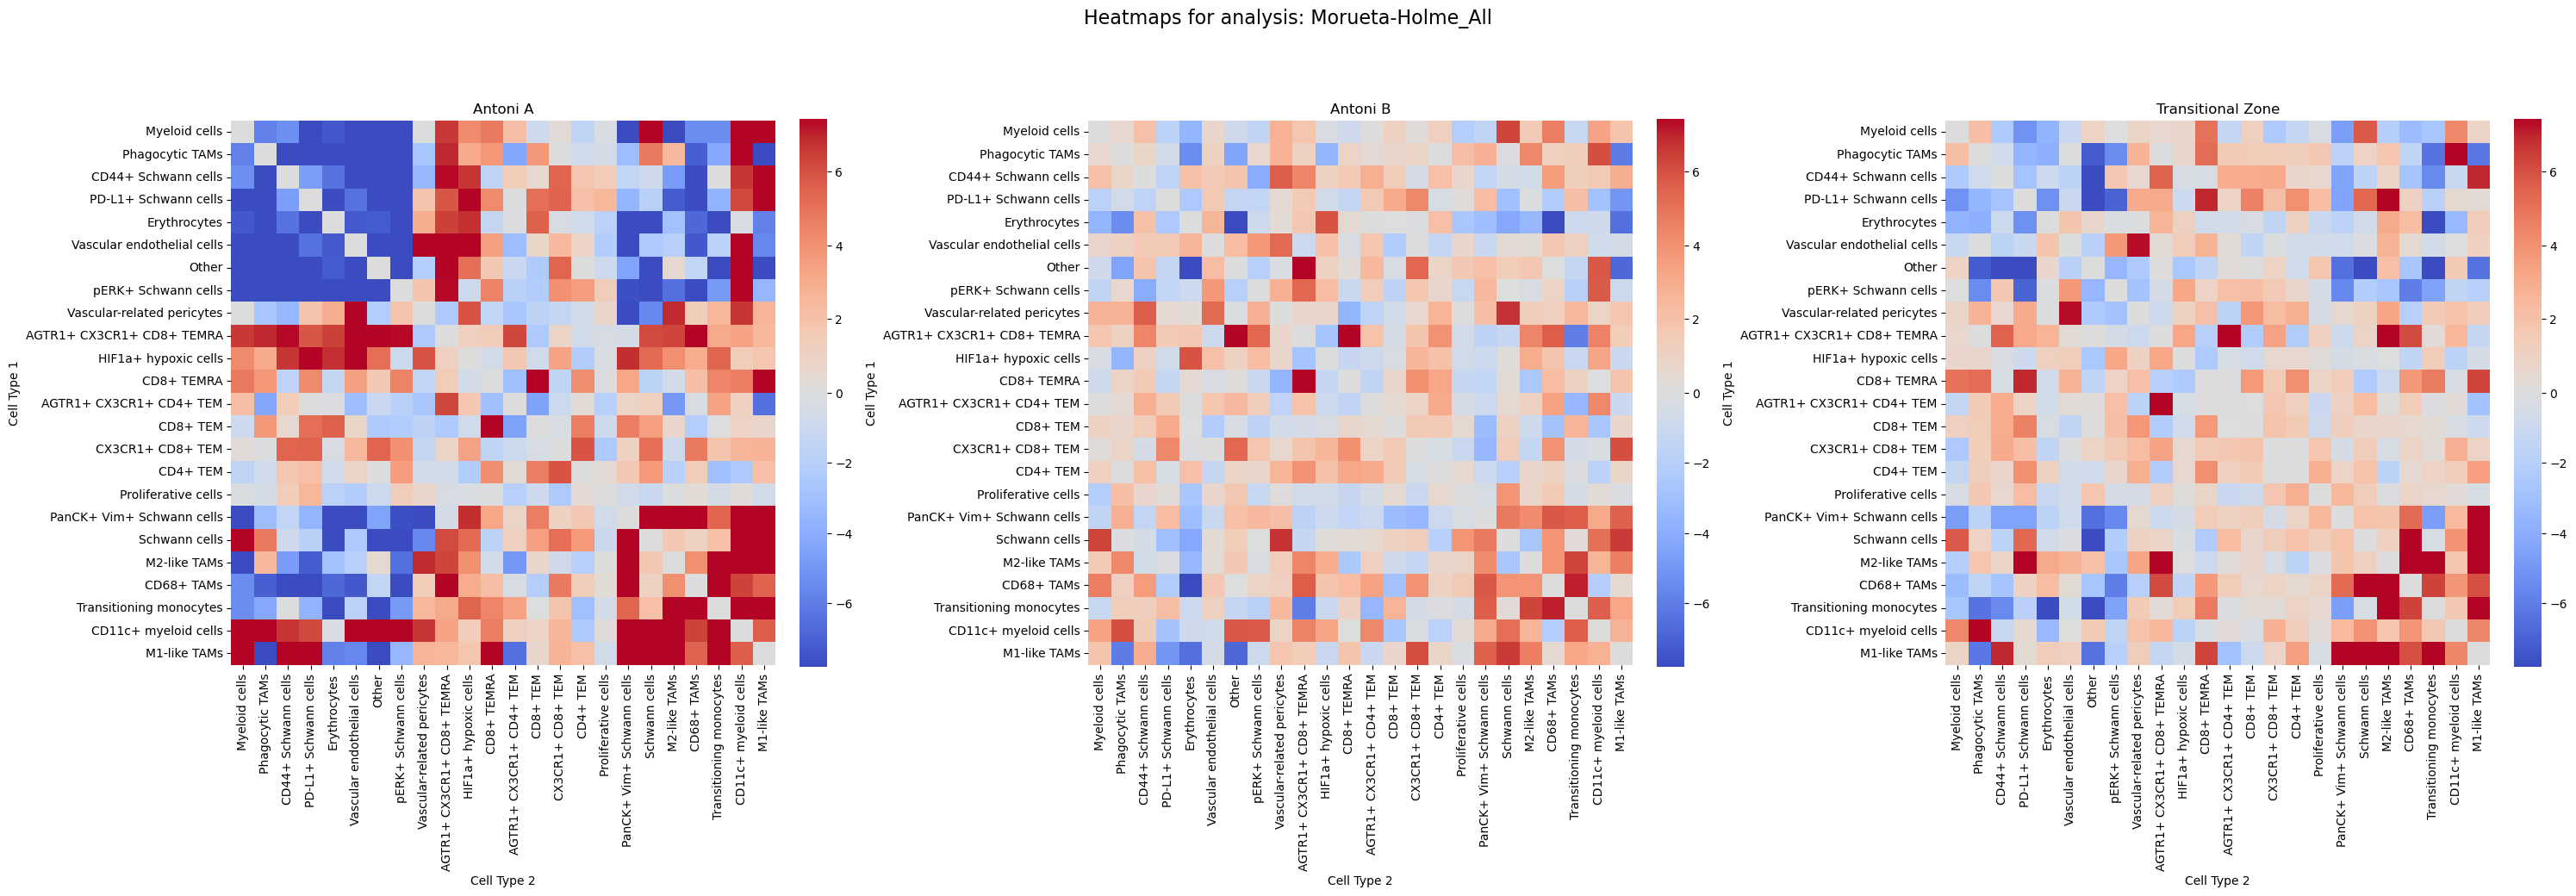

Saved heatmap for column 'Morueta-Holme_All' in folder 'spoox_figures'


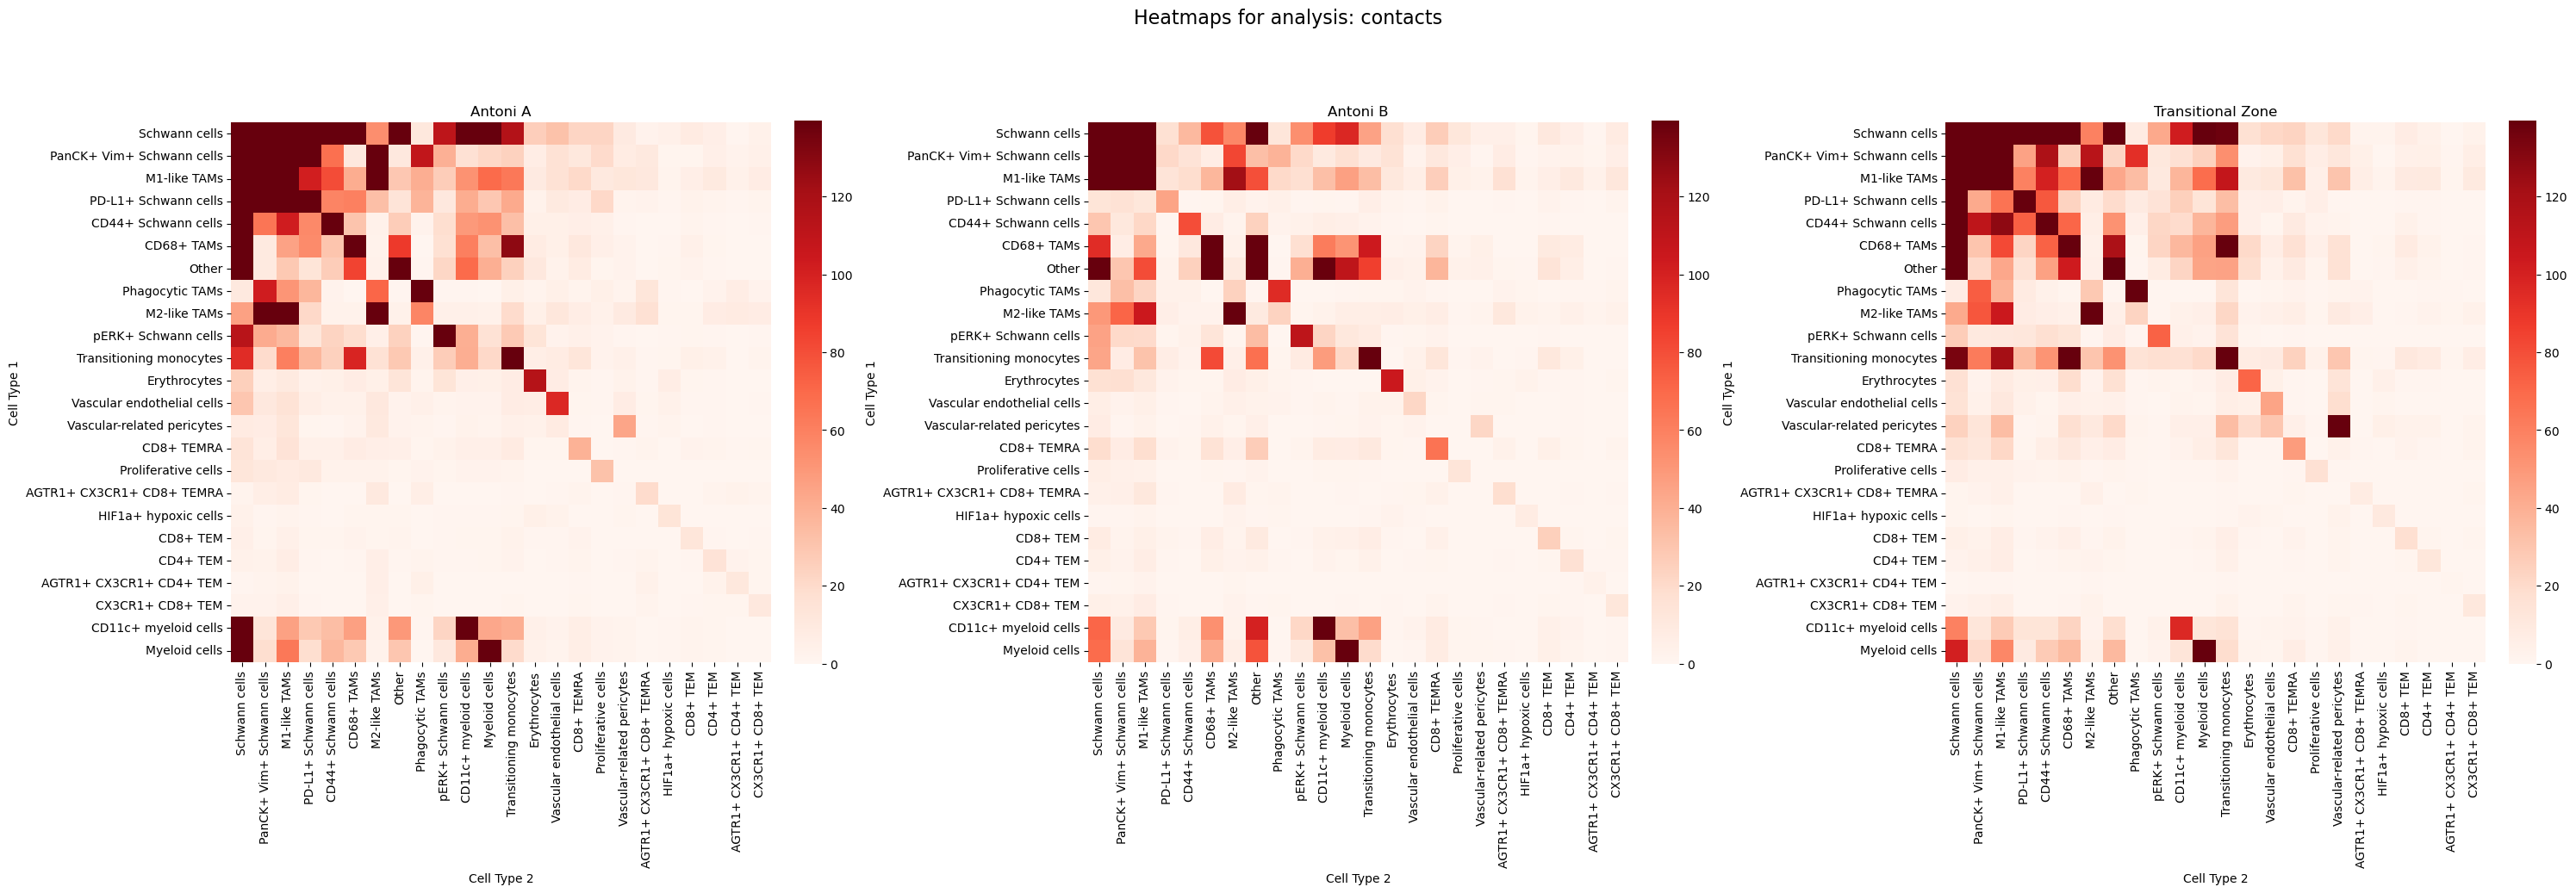

Saved heatmap for column 'contacts' in folder 'spoox_figures'


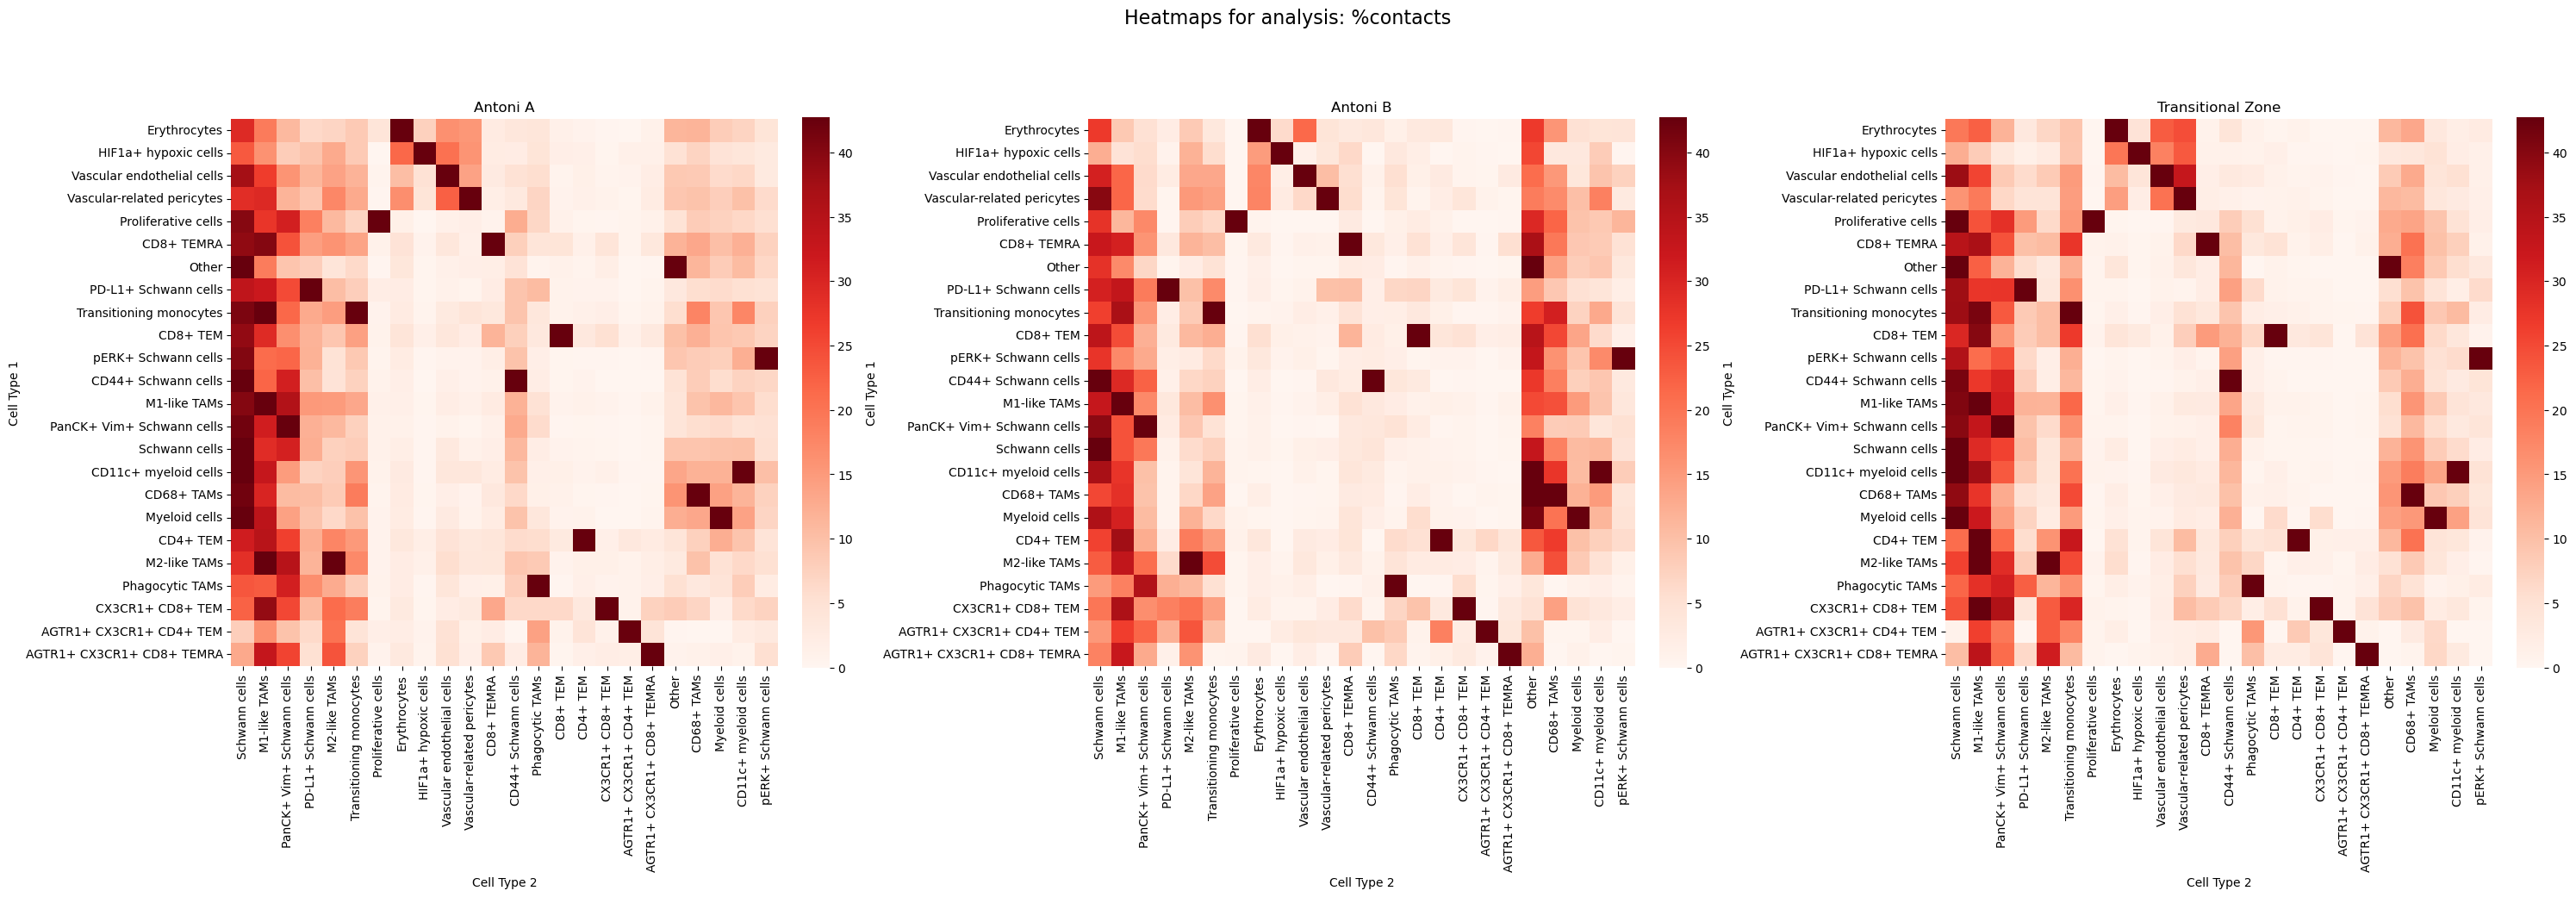

Saved heatmap for column '%contacts' in folder 'spoox_figures'


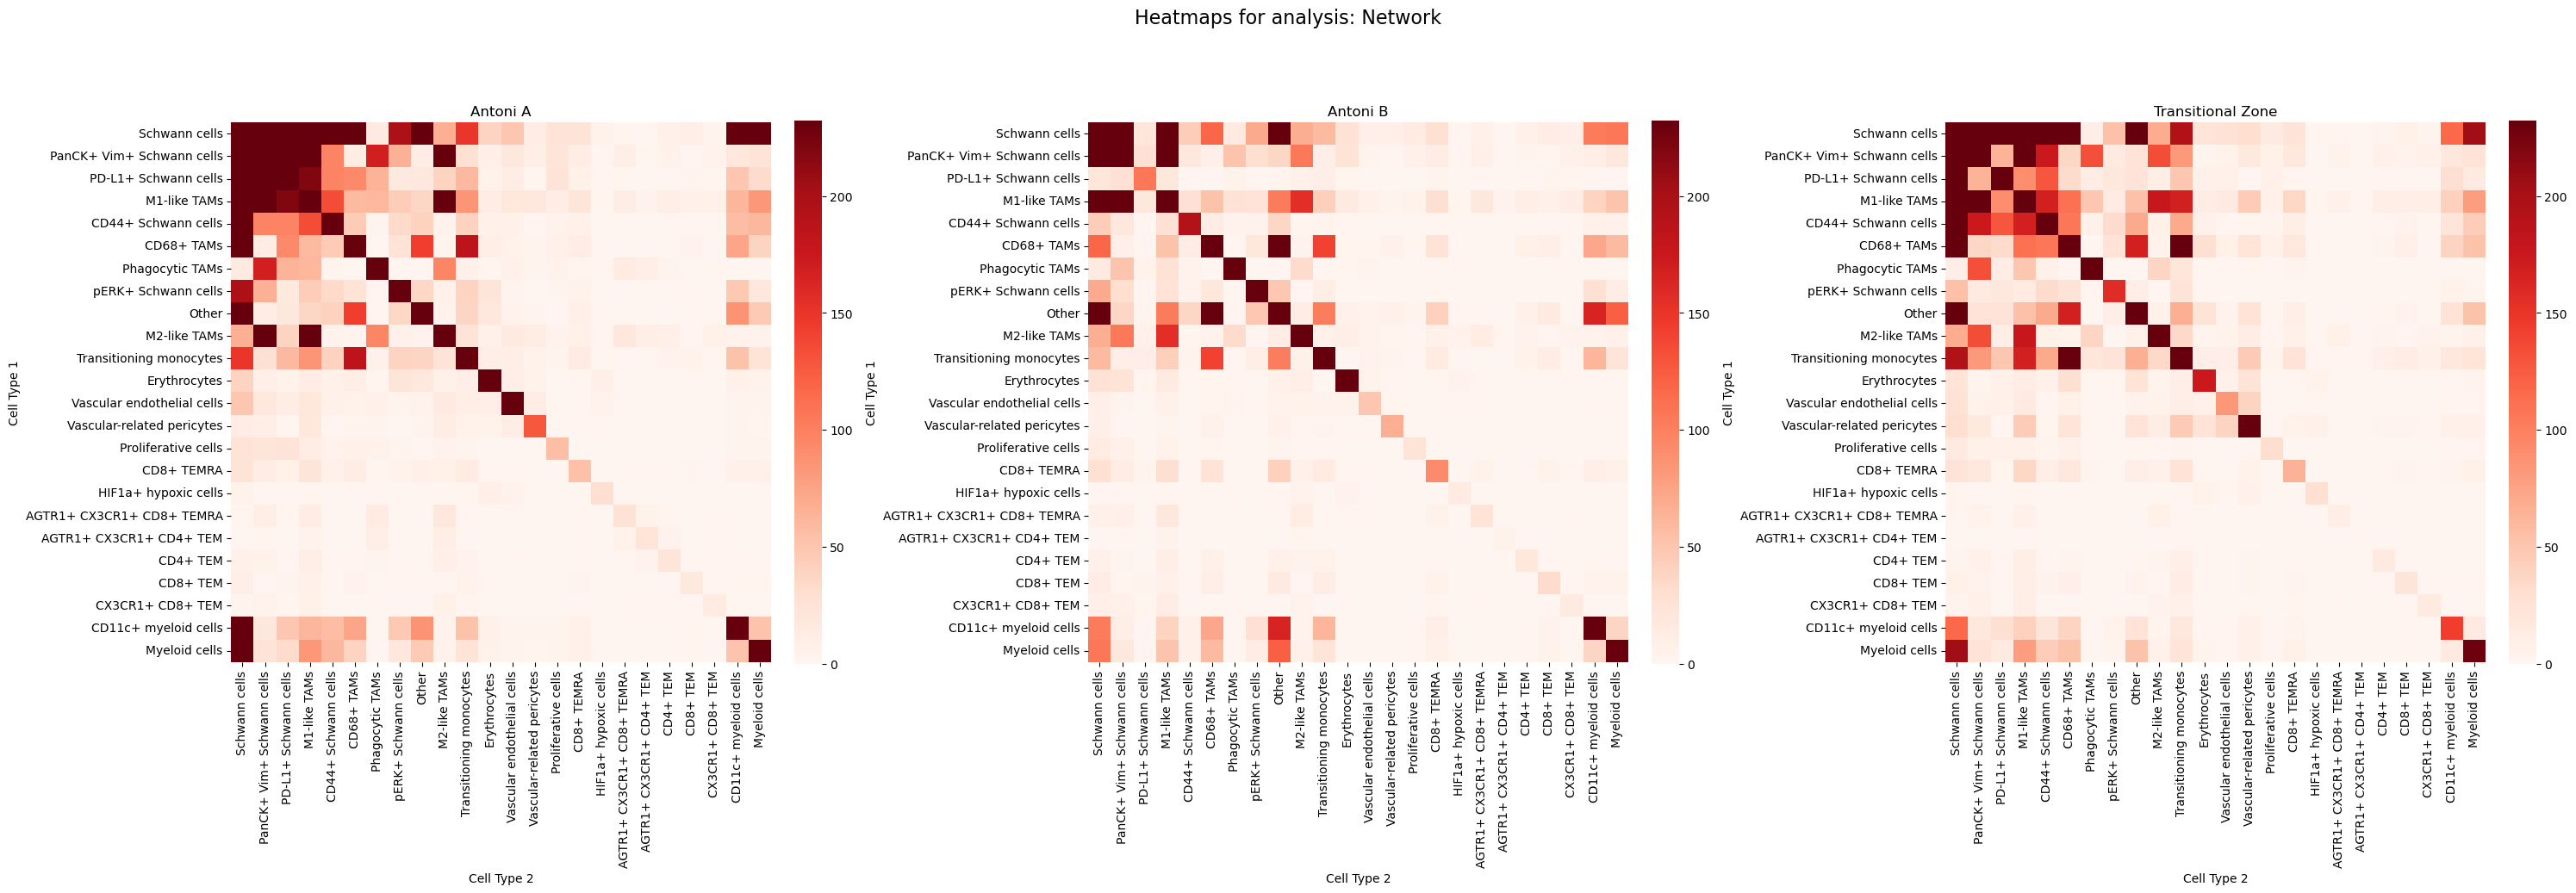

Saved heatmap for column 'Network' in folder 'spoox_figures'


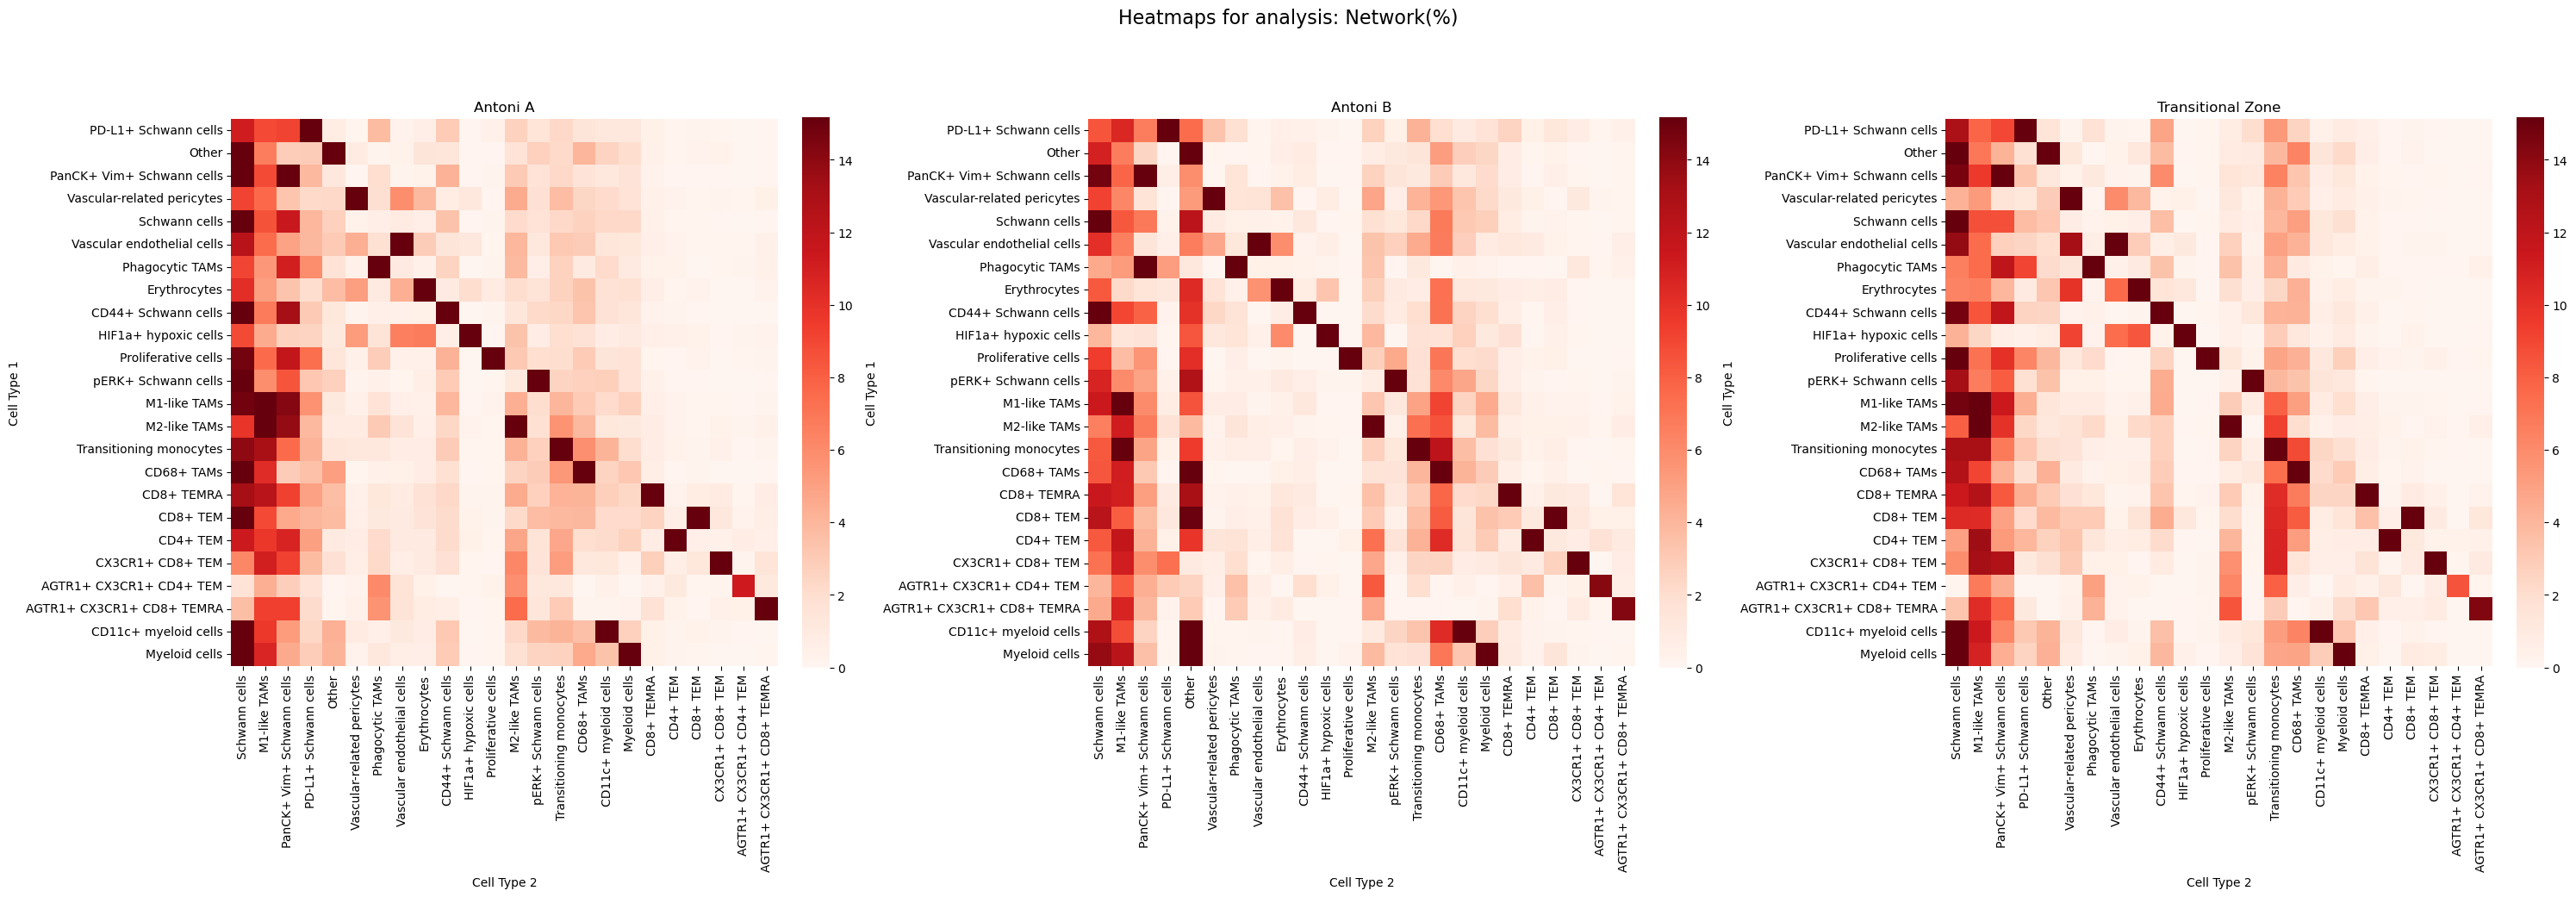

Saved heatmap for column 'Network(%)' in folder 'spoox_figures'


In [3]:
spatial.create_spoox_heatmaps(data)

# Adjacency cell networks

In [9]:
spatial.create_network_graphs?

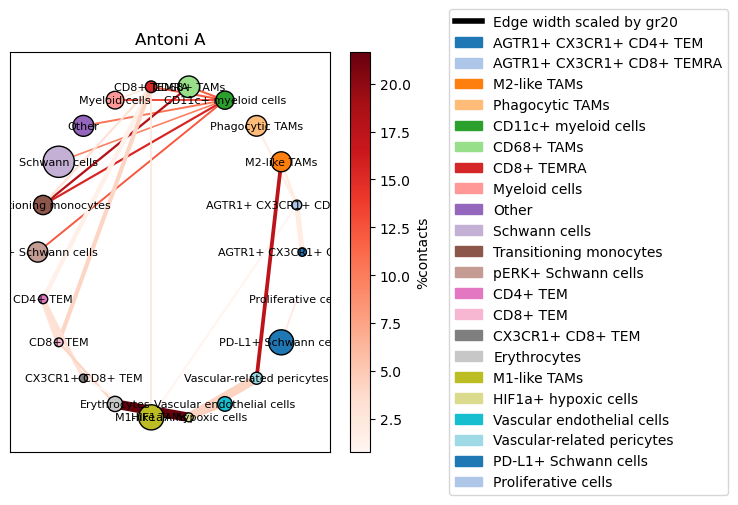

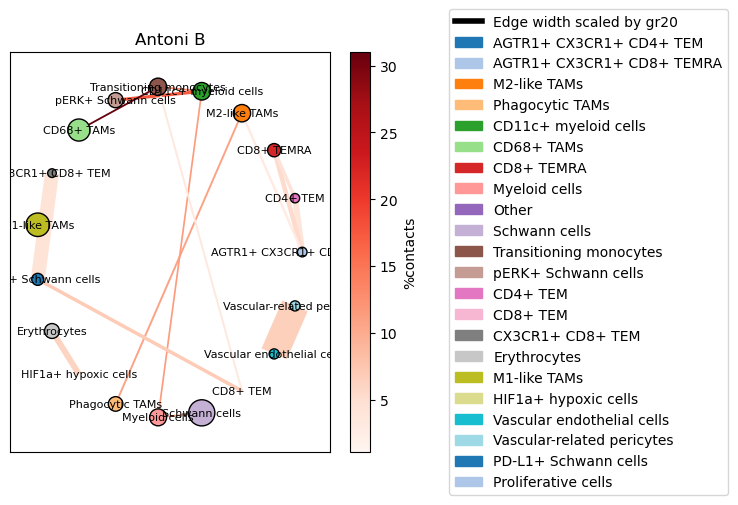

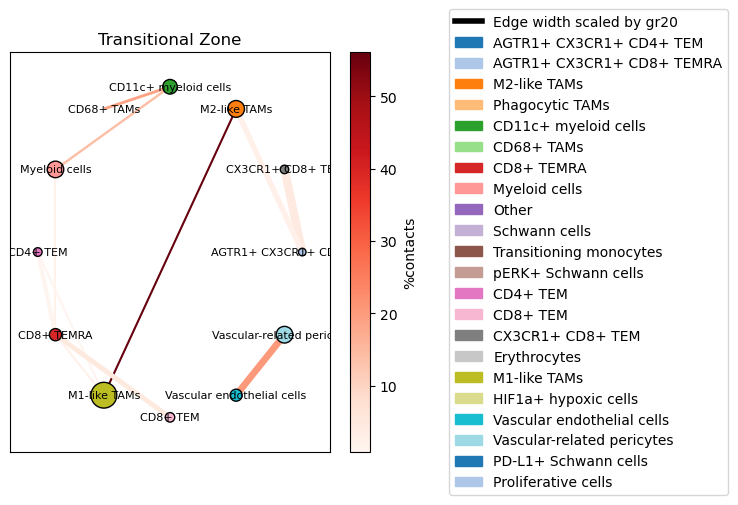

In [4]:
spatial.create_network_graphs(data)

## Plot specifc pop of interest

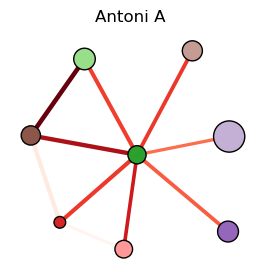

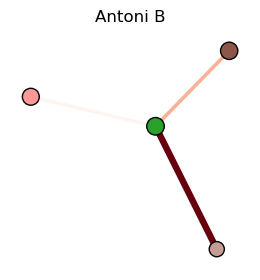

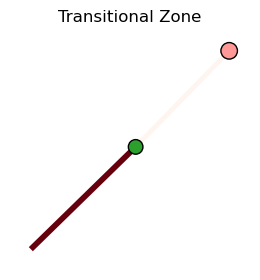

In [8]:
spatial.create_network_graphs(
    data, 
    fig_size=(3,3), 
    edge_scale=2, 
    draw_labels=False,
    figure_box=False,
    add_legend=False, 
    center_cell_population='CD11c+ myeloid cells',
    layout_type='kamada_kawai',
)

## Plot avoidance and enrichment
This doesn't add a lot extra over the MH data alone, as the GR / PCF data is not used to filter the data

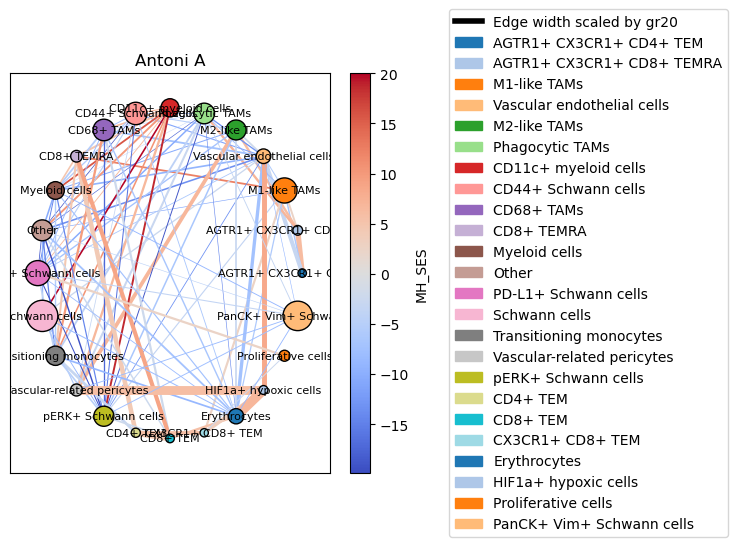

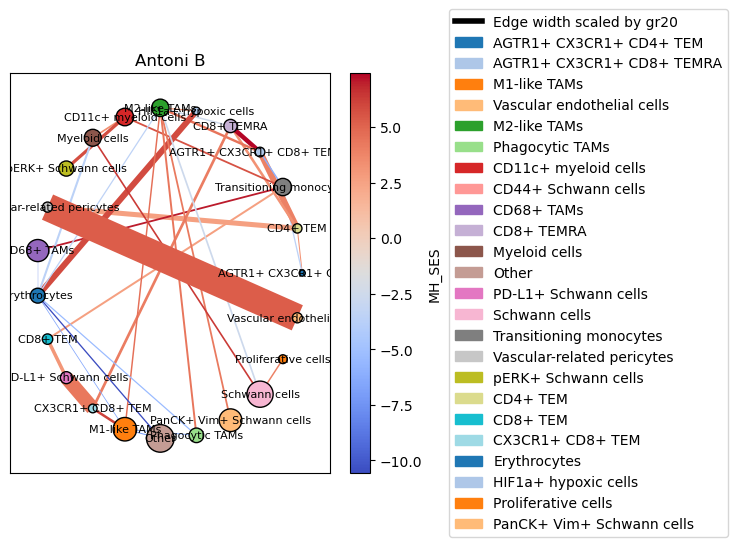

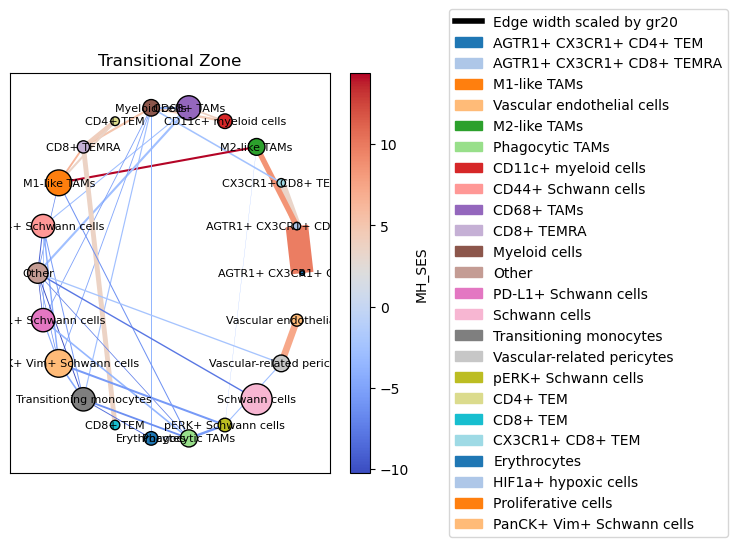

In [10]:
spatial.create_network_graphs(data,
                             filters={'MH_FDR_less': 0.05},
                             edge_color_column='MH_SES',
                             edge_color_map='coolwarm')   